In [1]:
#Spam Detection project using RNNs with Tensorflow

In [2]:
#Import packages
import tensorflow as tf
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model


2.3.0


In [3]:
#Read the data
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Data Preprocessing
#Remove unnecessary columns
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [5]:
#Rename the rest of columns
data.columns = ['Label', 'Data']
data.head()

,Label,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Convert object type labels to binary type labels
data['Binary'] = data['Label'].map({'ham': 0, 'spam': 1})
y = data['Binary'].values

In [7]:
#Split data into Train/Test sets
x_train, x_test, y_train, y_test = train_test_split(data['Data'], y, test_size=0.33)

In [8]:
#Convert sentences to sequences
max_vocab_size = 20000
#tokenization
tokenizer = Tokenizer(num_words=max_vocab_size)
#fit train data into tokenizer object
tokenizer.fit_on_texts(x_train)
#transform text into sequences on both sets
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [9]:
#Get the vocabulary
word2idx = tokenizer.word_index
V = len(word2idx)

print('Total number of unique tokens is %s' % V)

Total number of unique tokens is 7098


In [10]:
#Pad with zero variable length sequences 
#to get N x T matrix (N:num of samples, T: num of time steps)
train_data = pad_sequences(sequence_train)
print('Shape of train data tensor is', train_data.shape)

#set sequence length
T = train_data.shape[1]

test_data = pad_sequences(sequence_test, maxlen=T) #set maxlen=T to truncate 
                                                   #longer sequences in test set
print('Shape of test data tensor is', test_data.shape)

Shape of train data tensor is (3733, 162)
Shape of test data tensor is (1839, 162)


In [11]:
#Create the model

#Set embedding dimensionality
D = 20 #hyper parameter, we can choose any size of word vector

#Hidden state vector size(dimensionality)
M = 18

#Input Layer
i = Input(shape=(T,)) #input layer takes in sequences of integers, so shape is T
#Embedding Layer
x = Embedding(V + 1, D)(i) #this layer takes in sequences of integers and returns sequences of 
                           #word vectors; N * T * D array
                           #size of embedding should be (V + 1) x D because word index starts at 
                           #1 not 0
#LSTM layer
x = LSTM(M, return_sequences=True)(x) #since there's no encoder/decoder we return the sequences after each pass
x = GlobalMaxPooling1D()(x)

#Dense Layer
x = Dense(1, activation='sigmoid')(x) #since it's a binary classification problem we are choosing sigmoid actiation function

model = Model(i, x)

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#Train the model
model_tr = model.fit(x=train_data, y=y_train, epochs=8, validation_data=(test_data, y_test))

Epoch 1/8
117/117 [==============================] - 8s 64ms/step - loss: 0.4635 - accuracy: 0.8623 - val_loss: 0.3834 - val_accuracy: 0.8717
Epoch 2/8
117/117 [==============================] - 7s 60ms/step - loss: 0.3993 - accuracy: 0.8631 - val_loss: 0.3829 - val_accuracy: 0.8717
Epoch 3/8
117/117 [==============================] - 7s 62ms/step - loss: 0.3977 - accuracy: 0.8631 - val_loss: 0.3804 - val_accuracy: 0.8717
Epoch 4/8
117/117 [==============================] - 7s 62ms/step - loss: 0.3824 - accuracy: 0.8631 - val_loss: 0.3465 - val_accuracy: 0.8717
Epoch 5/8
117/117 [==============================] - 7s 62ms/step - loss: 0.2383 - accuracy: 0.9089 - val_loss: 0.1327 - val_accuracy: 0.9761
Epoch 6/8
117/117 [==============================] - 7s 61ms/step - loss: 0.0620 - accuracy: 0.9938 - val_loss: 0.0728 - val_accuracy: 0.9826
Epoch 7/8
117/117 [==============================] - 7s 61ms/step - loss: 0.0264 - accuracy: 0.9957 - val_loss: 0.0663 - val_accuracy: 0.9842
Epoch 

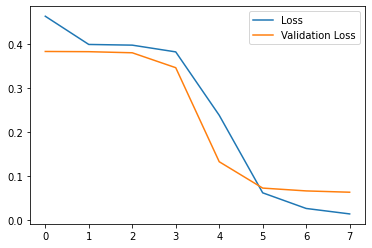

In [14]:
#Plot loss per iteration
plt.plot(model_tr.history['loss'], label='Loss')
plt.plot(model_tr.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

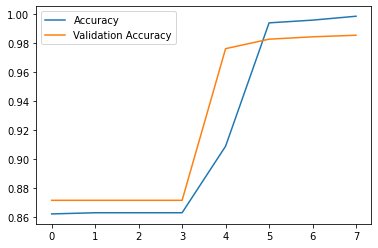

In [15]:
#Plot accuracy per iteration
plt.plot(model_tr.history['accuracy'], label='Accuracy')
plt.plot(model_tr.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()